## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#1A5D1A; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1A5D1A">Libraries</p>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import time

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from wordcloud import WordCloud

In [39]:
listings = pd.read_csv('C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\data\\listings.csv')
listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,173,2023-05-30,1.21,1,24,8,M130003350
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7208,3,243,2023-06-20,1.89,1,67,15,NaN
2,3427384,Rental unit in Edogawa · ★4.82 · 1 bedroom · 2...,13018876,Masakatsu,NaN,Edogawa Ku,35.68374,139.85971,Entire home/apt,7847,2,100,2023-05-22,0.93,2,231,19,Hotels and Inns Business Act | 東京都江戸川区保健所 | 18...


In [40]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11177 non-null  int64  
 1   name                            11177 non-null  object 
 2   host_id                         11177 non-null  int64  
 3   host_name                       11177 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11177 non-null  object 
 6   latitude                        11177 non-null  float64
 7   longitude                       11177 non-null  float64
 8   room_type                       11177 non-null  object 
 9   price                           11177 non-null  int64  
 10  minimum_nights                  11177 non-null  int64  
 11  number_of_reviews               11177 non-null  int64  
 12  last_review                     

In [41]:
listings.drop(columns=['neighbourhood_group'], inplace=True)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#1A5D1A; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1A5D1A">EDA</p>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Neighbourhood column</p>

> Neighbourhood 'Shinjuku Ku'가 대부분의 구역 목록을 보유하고 있고, 총 4개의 Neighbourhood 구역이 1000개 이상 구역 목록을 보유 하고 있다. 하위 12개의 Neighbourhood 구역은 10개 이하의 구역을 보유하고 있다.

In [42]:
#listings['neighbourhood'].value_counts().sort_values(ascending=True)

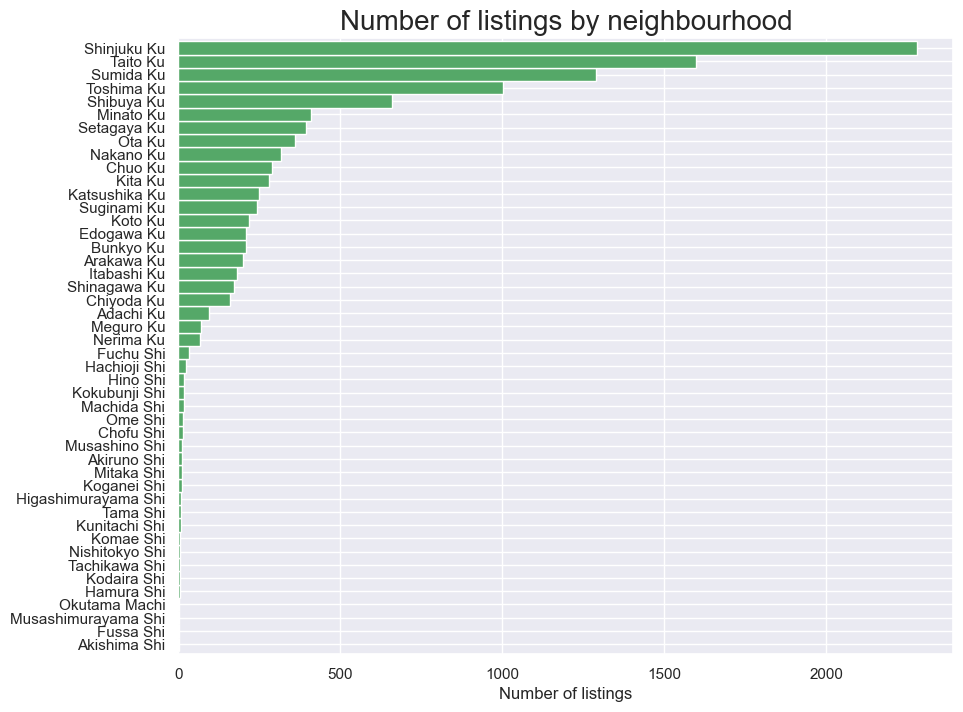

In [43]:
feq = listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='g', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

> 대부분의 숙소는 신주쿠 쿠에 밀집되어있다.

In [44]:
lats = listings['latitude'].tolist()
lngs = listings['longitude'].tolist()
locations = list(zip(lats, lngs))

map1 = folium.Map(location=[35.71707, 139.82608], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Room types</p>

#### 일본 객실 규정은 최대 180박 이내로 규정

> 일본 관광청(JTA)은 2021년부터 예약된 영업일 수를 포함한 일부 데이터가 정부의 관리 시스템 및 주택숙박 운영 시스템과의 통합을 통해 자동으로 계산된다고 발표했습니다. <br> 2021년 4월 1일부터 주택숙박사업법에 따라 운영하는 '신고 완료' 숙소의 모든 신규 예약은 연간 숙박 일수 한도인 180박에 포함됩니다. <br> 이는 숙박 기간이나 관련 법령에 관계없이 적용되며, 2021년 4월 1일부터 체크인 예정인 이미 확정된 예약 역시 숙박 기간에 관계없이 180박에 포함됩니다. <br> 이러한 산정 방식은 어느 플랫폼을 통해 예약이 이뤄졌는지와 관계없이 '신고 완료' 숙소에 모두 적용됩니다.

> 예: 2021년 1월 1일에 예약되었으며 체크인 날짜가 2021년 4월 1일인 60박 예약의 경우, 예약 가능한 180박 중 60박으로 계산되어 일본관광청 및 현지 당국에 정보가 공개됩니다. <br>또한, 2021년 8월 3일부터 에어비앤비는 '신고 완료' 숙소의 모든 예약 일수를 일본관광청(JTA)에 매일 제공하게 됩니다.

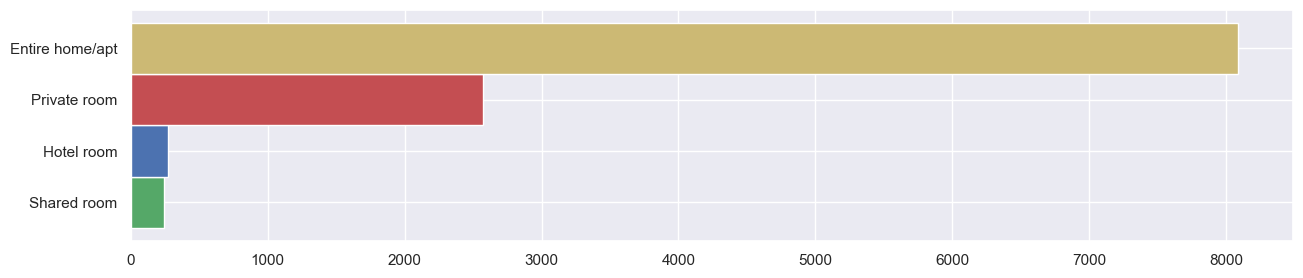

In [45]:
freq = listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r","y"])
plt.show()

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Minimum Nights</p>

> 도쿄 에어비엔비 고객들은 대부분 1 ~ 2박으로 이용한다.

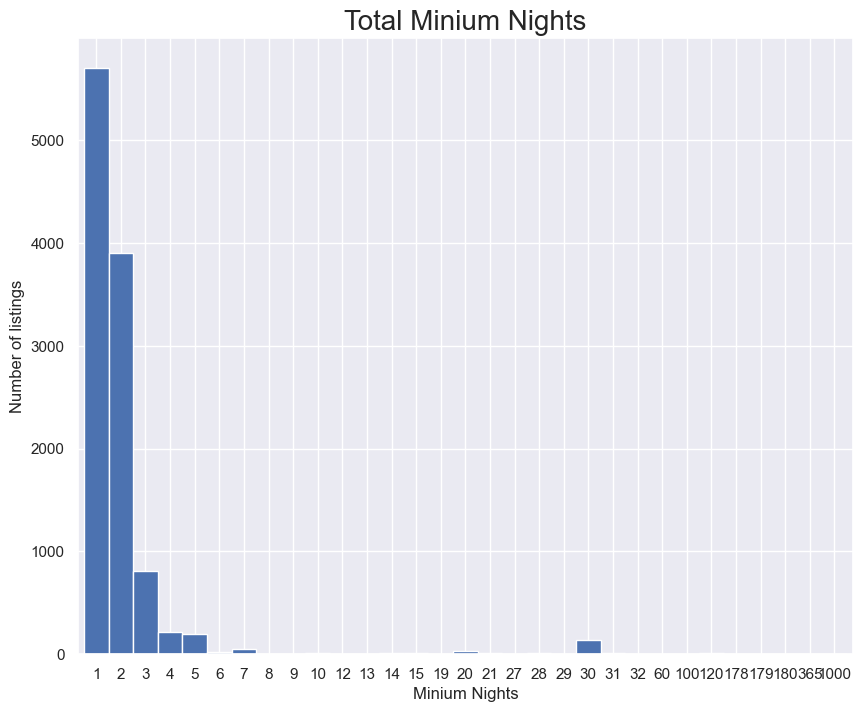

In [46]:
feq=listings['minimum_nights'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Total Minium Nights", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Minium Nights', fontsize=12)
plt.show()

> 일본 에어비엔비 숙소 규정 https://www.airbnb.co.kr/help/article/1386#health
- 별도의 특별한 규정은 없어보인다.
> 부동산 보유 유형 중 개인실이 40% 이상이면 불법(에어비엔비 공용 법)

In [47]:
private = listings[listings['room_type'] == "Private room"]
host_private = private.groupby(['host_id', 'host_name']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

,host_id,host_name,private_rooms
496,332233977,ﾎﾃﾙｳｨﾝｸﾞｲﾝﾀｰﾅｼｮﾅﾙﾌﾟﾚﾐｱﾑ,32
7,4981880,Meta,32
652,486824577,Stayme,31
487,325083334,Cob Hotel Asakusa,28
252,128821251,Akira,28


> 라이센스가 있더라도 개인실이 40% 이상이면, 신뢰할 수 없는 호스트 이다. 그렇지만 법적으로 규제는 딱히 안하므로, 활용해도 되긴 하나<br> 고객에게 추천하진 않는다?

> 라이센스 없는 호스트는 신뢰할 수 없으므로 삭제 할 것!!

In [48]:
meta = listings.loc[listings['host_id'] == 4981880] # host_name : Meta
meta['room_type'].value_counts()

Private room       32
Entire home/apt     1
Name: room_type, dtype: int64

> 의심스러운 host 

In [49]:
meta = private[private['host_id']== 4981880]
meta = meta[['name','host_id', 'host_name', 'latitude', 'longitude']]
meta.index.name = "listing_id"
meta

,name,host_id,host_name,latitude,longitude
listing_id,,,,,
4547,Boutique hotel in Bunkyo City · ★4.83 · 1 bedr...,4981880,Meta,35.707165,139.769257
4572,Boutique hotel in Bunkyo City · ★4.56 · 1 bedr...,4981880,Meta,35.707165,139.769257
4574,Boutique hotel in Bunkyo City · ★4.79 · 2 bedr...,4981880,Meta,35.707770,139.768510
4597,Boutique hotel in Bunkyo City · ★4.58 · 1 bedr...,4981880,Meta,35.707165,139.769257
4599,Boutique hotel in Bunkyo City · ★4.59 · 1 bedr...,4981880,Meta,35.707165,139.769257
4601,Boutique hotel in Bunkyo City · ★4.57 · 1 bedr...,4981880,Meta,35.706900,139.768170
4603,Boutique hotel in Bunkyo City · ★4.77 · 1 bedr...,4981880,Meta,35.707165,139.769257
4604,Boutique hotel in Bunkyo City · ★4.68 · 2 bedr...,4981880,Meta,35.707165,139.769257
4794,Boutique hotel in Chuo City · ★4.66 · 1 bedroo...,4981880,Meta,35.692250,139.779660


In [50]:
freq = listings.groupby(['host_id', 'host_name']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 20]
freq

,host_id,host_name,num_host_listings
1518,258668827,Hiroshi,98
1815,321365764,Japan House,65
1455,247326938,Pqd,61
1356,229627088,宅東zaito,60
704,94302731,Ken'S Place,56
...,...,...,...
2200,418812057,ホテルウィングインターナショナルプレミアム渋谷,20
1142,198552582,Masa,20
927,144246778,BIG House,20
261,35258613,Yuri,20


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Price</p>

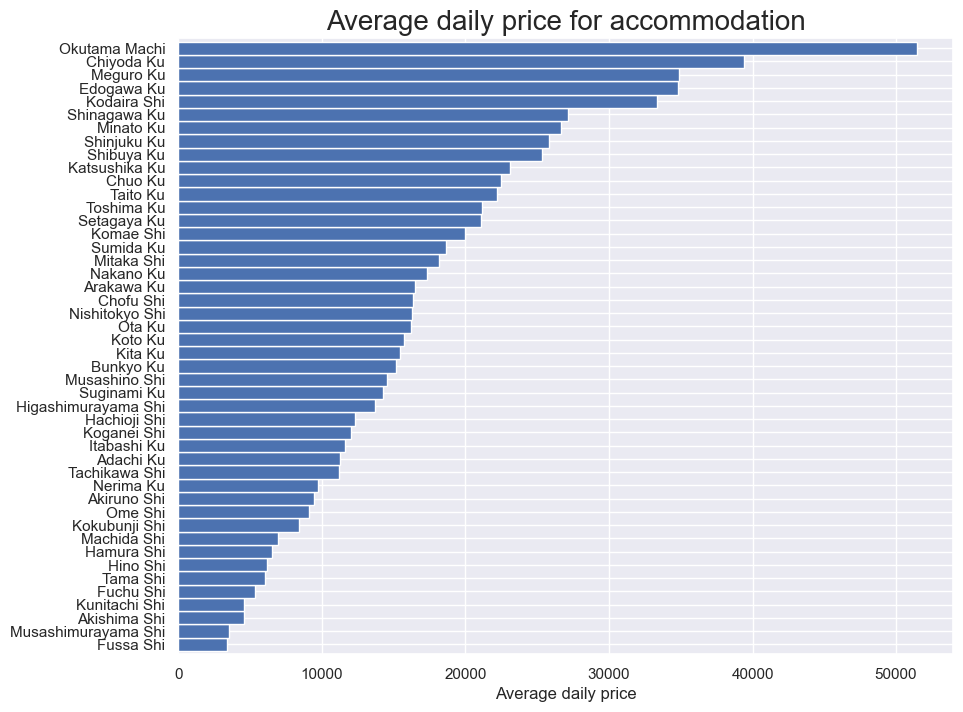

In [55]:
feq = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for accommodation", fontsize=20)
plt.xlabel('Average daily price', fontsize=12)
plt.ylabel("")

plt.show()

#* 인원 수에 따라 가격 변동 유무(일단 무시하고 함)
#* neithbourhood와 가격 관계성

In [1]:
listing2 = pd.read_csv('/Users/genie/Documents/COLLABORATION/AirbnbWise/Tokyo_Airbnb/data/listings.csv.gz', compression='gzip')
listing2.head()

NameError: name 'pd' is not defined